## Лабораторная работа 4. Фильтры из файла

### Патракова Екатерина, РИМ-181226

In [2]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
%matplotlib inline

## Выполните свертку изображения

In [3]:
image = np.array([[0, -8, -3, -2], 
                  [1, 9, -8, 0], 
                  [9, -4, 5, -9], 
                  [6, -4, 6, 3]])

kernel = np.array([[4, -5, 4], 
                   [-6, -8, -2], 
                   [1, 5, 5]])

print(convolve2d(kernel, image, mode='valid'))

[[  7 -88]
 [ 94  -7]]


## box-фильтр

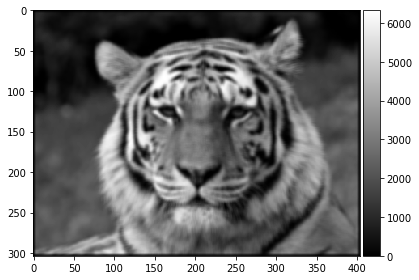

In [23]:
img=imread('tiger-gray-small.png')
convolved = convolve2d(img, np.ones((5, 5)))
imshow(convolved, cmap='gray')

In [30]:
def box_filter(img, size):
    result = np.zeros((img.shape[0]-size+1, img.shape[1]-size+1), dtype=np.int)

    for i in range (img.shape[0]-size+1):
        for j in range (img.shape[1]-size+1):
            a=0
            for k in range (size):
                for n in range (size):
                    a=a+img[i+k, j+n]
            result[i, j] = int(a/size**2)
    return result

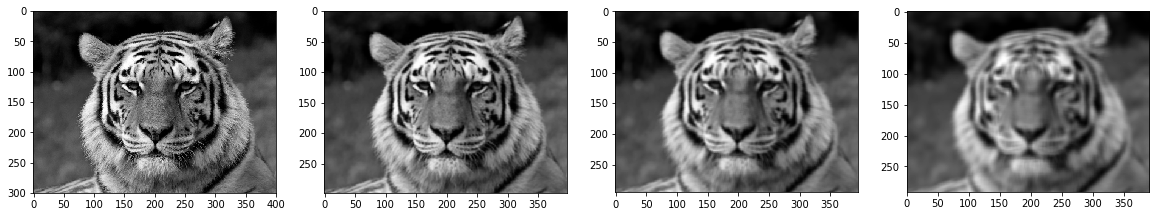

In [31]:
plt.figure(figsize=(20,10))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 4, 2)
plt.imshow(box_filter(img, 3), cmap='gray')

plt.subplot(1, 4, 3)
plt.imshow(box_filter(img, 5), cmap='gray')

plt.subplot(1, 4, 4)
plt.imshow(box_filter(img, 9), cmap='gray')

## Подсчет функции Гаусса

In [8]:
import numpy as np

In [37]:
def gauss(sigma, x, y):
    return np.exp((-x**2-y**2)/(2*sigma**2))/(2*np.pi*sigma**2) 


In [58]:
gauss(1, 1, 1)

0.05854983152431917

## Ядро гауссовского фильтра

На стандартный вход подается параметр σ гауссовского фильтра. Подсчитайте и напечатайте на стандартый вывод элементы ядра. Для подсчета значений функции Гаусса используйте функцию из предыдущего задания. σ может быть нецелым, тогда округлите K с помощью функции round. Элементы ядра выводите с 5 цифрами после запятой.

In [38]:
def gauss_kernel(sigma):
    k = round(3*sigma)
    kernel = np.array([[gauss(sigma, x, y) for x in range(-k, k+1)] for y in range(-k, k+1)])
    norm_kernel = kernel / np.sum(kernel, axis=(0,1))
    return norm_kernel

## Гауссовская фильтрация

In [39]:
import numpy as np

In [40]:
img=imread('tiger-gray-small.png')

In [44]:
img_066=convolve2d(img, gauss_kernel(0.66), mode='valid').astype('uint8')
img_3=convolve2d(img, gauss_kernel(3), mode='valid').astype('uint8')

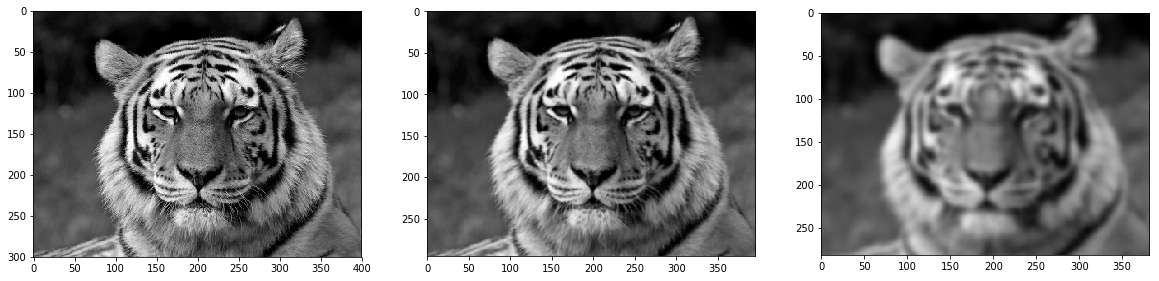

In [46]:
plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(img_066, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(img_3, cmap='gray')

## Повышение резкости изображения.

In [54]:
img=imread('tiger-gray-small.png')

In [55]:
kernel=np.matrix(np.array([[-1,-2, -1],
                           [-2, 22, -2],
                           [-1, -2, -1]])/10)

In [56]:
m=kernel.shape[0]-1
n=kernel.shape[1]-1
img_clear=np.clip(convolve2d(img/255, kernel), 0, 1)
img_clear = np.floor(img_clear * 255)
img_clear=img_clear.astype('uint8')[m:-m, n:-n]

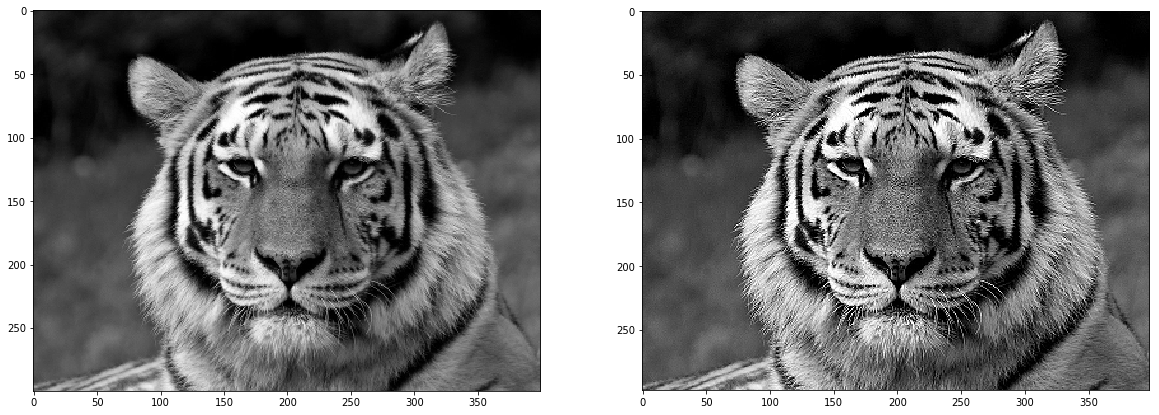

In [58]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(img_clear, cmap='gray')

## Медианный фильтр

In [59]:
img=imread('tiger-gray-small.png')

In [63]:
def median_filter(img, size):
    res = img.copy()
    half = size//2

    for i in range(half,img.shape[0]-half):
        for j in range(half,img.shape[1]-half):
            a = img[i-half:i+half+1,j-half:j+half+1]
            res[i][j] = np.median(a)

    res = res[half:img.shape[0]-half,half:img.shape[1]-half]
    return res

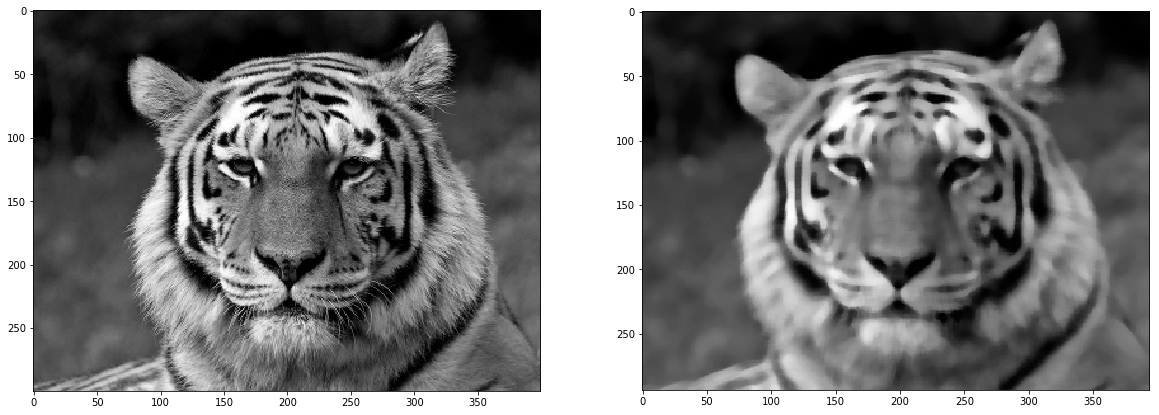

In [64]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(median_filter(img, 7), cmap='gray')